In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
dataset = pd.read_csv("nlp.csv", encoding = "ISO-8859-1")

In [3]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
print(dataset.isna().values.any())

False


In [5]:
dataset.columns = ['target','ids','date', 'flag', 'users', "texts"]

Text(0, 0.5, 'total text')

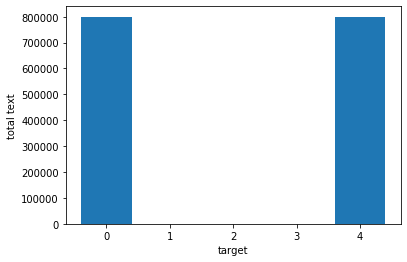

In [24]:
target_count = dataset.groupby("target").count()
plt.bar(target_count.index.values, target_count["texts"])
plt.xlabel('target')
plt.ylabel('total text')

In [18]:
x_train, x_test, y_train, y_test = train_test_split(dataset['texts'], dataset['target'],test_size = 0.3, random_state = 1)

In [19]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,2), tokenizer = token.tokenize)
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [20]:

# Spot Check Algorithms
models = []
models.append(('MNB',MultinomialNB().fit(x_train, y_train)))
models.append(('LR',LogisticRegression(solver='sag', multi_class='ovr').fit(x_train, y_train)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

MNB: 0.778462 (0.000932)
LR: 0.791584 (0.000805)


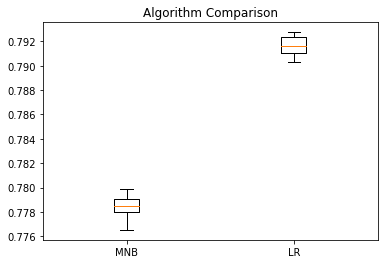

In [21]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [22]:
clf = LogisticRegression(solver='sag', multi_class='ovr').fit(x_train,y_train)
predicted = clf.predict(x_test)
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[188603  51431]
 [ 47973 191993]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79    240034
           4       0.79      0.80      0.79    239966

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000

